# The Problem 


Lay people are not aware of the different circumstances that may affect the mitigation of the spread of COVID-19. Additionally, most people are not aware of how the different kinds of responses work and how they affect the number when it comes to the number of new cases daily and how effective said measures are. Everyone has different reactions to implementing lockdowns and other actions as it affects how they live day-to-day. Different countries are trying different ways to mitigate COVID with varying levels of success, and the countries mentioned above being the prime examples of success. However, for our country, the Philippines, the success rate of trying to mitigate the virus suggests we are in desperate need of new ways to help diminish the number of new daily cases.
The question that this exploration is trying to answer is “How can we best hamper the spread of COVID-19?”. We will try to answer this by observing trends and anomalies in data we find interesting. Below are questions that we believe will help us to answer our main question.


# Research Questions



1.   What health and quarantine measures were implemented by countries that successfully mitigated COVID-19?
2.   What is the trend of the number of new cases when lockdown is implemented? What is the trend of the number of new cases when there is no lockdown?
3. What is the trend of the number of new cases when mass testing is being carried out? What is the trend of the number of new cases when there is no mass testing?
4. Does the implementation of contact tracing while mass testing is being carried out affect the number of daily cases?
5. What is the trend of the number of new cases when lockdown is implemented while vaccines are being rolled out?
6. What COVID-19 responses should a country implement to best hamper the spread of COVID-19?



## Data Preparation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

### COVID Dataset

This dataset was retrieved from Our World in Data (OWID) and can be accessed in the following link:

https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

The file was renamed, but the contents were not modified.

#### Read the CSV file

##### Local file system

In [2]:
covid_df = pd.read_csv('D:\OneDrive - De La Salle University - Manila\Documents\La Salle\DATASCI\covid\covid-data.csv')

##### Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()
covid_df = pd.read_csv('covid-data.csv')

#### Extract important columns

In [3]:
covid_df = covid_df[[
    "iso_code",
    "location",
    "date",
    "total_cases",
    "new_cases",
    "population",
    "people_vaccinated",
    "people_fully_vaccinated",
]]

#### Rename the columns for consistency and readability

In [4]:
covid_df = covid_df.rename({'iso_code': 'country_code', 'location': 'country_name'}, axis=1)

#### Convert date column datatype to datetime

In [5]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85790 entries, 0 to 85789
Data columns (total 8 columns):
country_code               85790 non-null object
country_name               85790 non-null object
date                       85790 non-null datetime64[ns]
total_cases                83669 non-null float64
new_cases                  83667 non-null float64
population                 85238 non-null float64
people_vaccinated          8991 non-null float64
people_fully_vaccinated    6665 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 5.2+ MB


#### Remove rows with invalid country codes

In [6]:
print(covid_df[covid_df["country_code"].str.len() != 3]['country_code'].unique())

['OWID_AFR' 'OWID_ASI' 'OWID_EUR' 'OWID_EUN' 'OWID_INT' 'OWID_KOS'
 'OWID_NAM' 'OWID_CYN' 'OWID_OCE' 'OWID_SAM' 'OWID_WRL']


Some countries have a prefix OWID in their country code. We remove all entries with these countries.

In [7]:
# Valid country codes have a length of 3. Remove those that are not. 
covid_df = covid_df[covid_df["country_code"].str.len() == 3]
print(covid_df["country_code"].unique())

['AFG' 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CYM'
 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW'
 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI'
 'EST' 'SWZ' 'ETH' 'FRO' 'FLK' 'FJI' 'FIN' 'FRA' 'GAB' 'GMB' 'GEO' 'DEU'
 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GTM' 'GGY' 'GIN' 'GNB' 'GUY' 'HTI' 'HND'
 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM'
 'JPN' 'JEY' 'JOR' 'KAZ' 'KEN' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR'
 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL'
 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR'
 'NAM' 'NRU' 'NPL' 'NLD' 'NZL' 'NIC' 'NER' 'NGA' 'MKD' 'NOR' 'OMN' 'PAK'
 'PSE' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT' 'QAT' 'ROU' 'RUS' 'RWA'
 'SHN' 'KNA' 'LCA' 'VCT' 'WSM' 'SMR' 'STP' 'SAU' 'S

#### Fill in missing values

Replace the first values of some columns to 0 to prepare for interpolation

In [8]:
# The first entry for each country will start with 0 people vaccinated
covid_df.loc[covid_df.groupby('country_code')['people_vaccinated'].head(1).index, 'people_vaccinated'] = 0
covid_df.loc[covid_df.groupby('country_code')['people_fully_vaccinated'].head(1).index, 'people_fully_vaccinated'] = 0

Interpolate after grouping by country

In [9]:
covid_df[['people_vaccinated', 'people_fully_vaccinated']] = covid_df.groupby('country_code').apply(lambda group: group[['people_vaccinated', 'people_fully_vaccinated']].interpolate())

# Missing values for total and new cases are found before first case appears, just replace with 0
covid_df['total_cases'].fillna(0, inplace=True)
covid_df['new_cases'].fillna(0, inplace=True)

# some columns became double type, so convert to int
covid_df = covid_df.astype({'total_cases': int, 'new_cases': int, 'population': int, 'people_vaccinated': int, 'people_fully_vaccinated': int})

### Government Response Dataset

This dataset was retrieved from Oxford Covid-19 Government Response Tracker (OxCGRT) and can be accessed in the following link:

https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_latest.csv

The file was renamed, but the contents were not modified.

#### Read the CSV file

##### Local file system

In [10]:
res_df = pd.read_csv('D:\OneDrive - De La Salle University - Manila\Documents\La Salle\DATASCI\covid\government-responses.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Google Colab

In [ ]:
res_df = pd.read_csv('government-responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Extract important columns

In [11]:
res_df = res_df[[
    "CountryName",
    "CountryCode",
    "Date",
    "C1_School closing",
    "C2_Workplace closing",
    "C3_Cancel public events",
    "C4_Restrictions on gatherings",
    "C5_Close public transport",
    "C6_Stay at home requirements",
    "C7_Restrictions on internal movement",
    "C8_International travel controls",
    "E1_Income support",
    "E2_Debt/contract relief",
    "E3_Fiscal measures",
    "E4_International support",
    "H1_Public information campaigns",
    "H2_Testing policy",
    "H3_Contact tracing",
    "H4_Emergency investment in healthcare",
    "H5_Investment in vaccines",
    "H6_Facial Coverings",
    "H7_Vaccination policy",
    "H8_Protection of elderly people",
]]

#### Rename the columns for consistency and readab

In [12]:
res_df = res_df.rename({'CountryCode': 'country_code', 'CountryName': 'country_name', 'Date': 'date'}, axis=1)

#### Fill in missing values

Assume that all responses will be propagated to the next day if there's no data 

In [13]:
# Forward fill
res_df = res_df.ffill()

#### Change data types

In [14]:
# Dates were YYYYMMDD in an integer format
# Convert to string, then to datetime
res_df['date'] = res_df['date'].astype(str)
res_df['date'] = pd.to_datetime(res_df['date'])
res_df = res_df.astype({
    "C1_School closing": int,
    "C2_Workplace closing": int,
    "C3_Cancel public events": int,
    "C4_Restrictions on gatherings": int,
    "C5_Close public transport": int,
    "C6_Stay at home requirements": int,
    "C7_Restrictions on internal movement": int,
    "C8_International travel controls": int,
    "E1_Income support": int,
    "E2_Debt/contract relief": int,
    "E3_Fiscal measures": int,
    "E4_International support": int,
    "H1_Public information campaigns": int,
    "H2_Testing policy": int,
    "H3_Contact tracing": int,
    "H4_Emergency investment in healthcare": int,
    "H5_Investment in vaccines": int,
    "H6_Facial Coverings": int,
    "H7_Vaccination policy": int,
    "H8_Protection of elderly people": int,
})
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137690 entries, 0 to 137689
Data columns (total 23 columns):
country_name                             137690 non-null object
country_code                             137690 non-null object
date                                     137690 non-null datetime64[ns]
C1_School closing                        137690 non-null int32
C2_Workplace closing                     137690 non-null int32
C3_Cancel public events                  137690 non-null int32
C4_Restrictions on gatherings            137690 non-null int32
C5_Close public transport                137690 non-null int32
C6_Stay at home requirements             137690 non-null int32
C7_Restrictions on internal movement     137690 non-null int32
C8_International travel controls         137690 non-null int32
E1_Income support                        137690 non-null int32
E2_Debt/contract relief                  137690 non-null int32
E3_Fiscal measures                       137690 non-null in

### Merge the COVID and government response datasets

Inner join on country code and date

In [15]:
df = pd.merge(covid_df, res_df, on=['country_code', 'date'])
# country_name was doubled, so drop one and rename the other
df = df.drop(['country_name_y'], axis = 1)
df = df.rename({'country_name_x': 'country_name'}, axis=1)
df.head(200)

,country_code,country_name,date,total_cases,new_cases,population,people_vaccinated,people_fully_vaccinated,C1_School closing,C2_Workplace closing,...,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people
0,AFG,Afghanistan,2020-02-24,1,1,38928341,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,AFG,Afghanistan,2020-02-25,1,0,38928341,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,AFG,Afghanistan,2020-02-26,1,0,38928341,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,AFG,Afghanistan,2020-02-27,1,0,38928341,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,AFG,Afghanistan,2020-02-28,1,0,38928341,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,AFG,Afghanistan,2020-02-29,1,0,38928341,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
6,AFG,Afghanistan,2020-03-01,1,0,38928341,0,0,0,0,...,0,0,2,1,1,0,0,0,0,1
7,AFG,Afghanistan,2020-03-02,1,0,38928341,0,0,0,0,...,0,0,2,1,1,0,0,0,0,1
8,AFG,Afghanistan,2020-03-03,2,1,38928341,0,0,0,0,...,0,0,2,1,1,0,0,0,0,1
9,AFG,Afghanistan,2020-03-04,4,2,38928341,0,0,0,0,...,0,0,2,1,1,0,0,0,0,1


#### Get date ranges for consistency of the data

In [16]:
# Get the first and last most common dates, and remove all entries that are outside these dates
# Makes it so that for each date in the dataset, there is data for all countries
earliest_date = df.groupby('country_code').head(1)['date'].mode().iloc[0]
latest_date = df.groupby('country_code').tail(1)['date'].mode().iloc[0]

earliest_df = df.groupby('country_code').filter(lambda group: group.head(1)['date'] <= earliest_date)
latest_df = df.groupby('country_code').filter(lambda group: group.tail(1)['date'] >= latest_date)
relevant_df = pd.merge(earliest_df, latest_df, on=df.columns.tolist())
relevant_df = relevant_df[(relevant_df['date'] >= earliest_date) & (relevant_df['date'] <= latest_date)]
relevant_df = relevant_df[relevant_df['total_cases'] > 0]

# Exploratory Data Analysis

## What health and quarantine measures were implemented by countries that successfully mitigated COVID-19?

### Initial assumption

We now assume countries that eradicated COVID are the ones with less than 20  new cases at the end of the dataset.

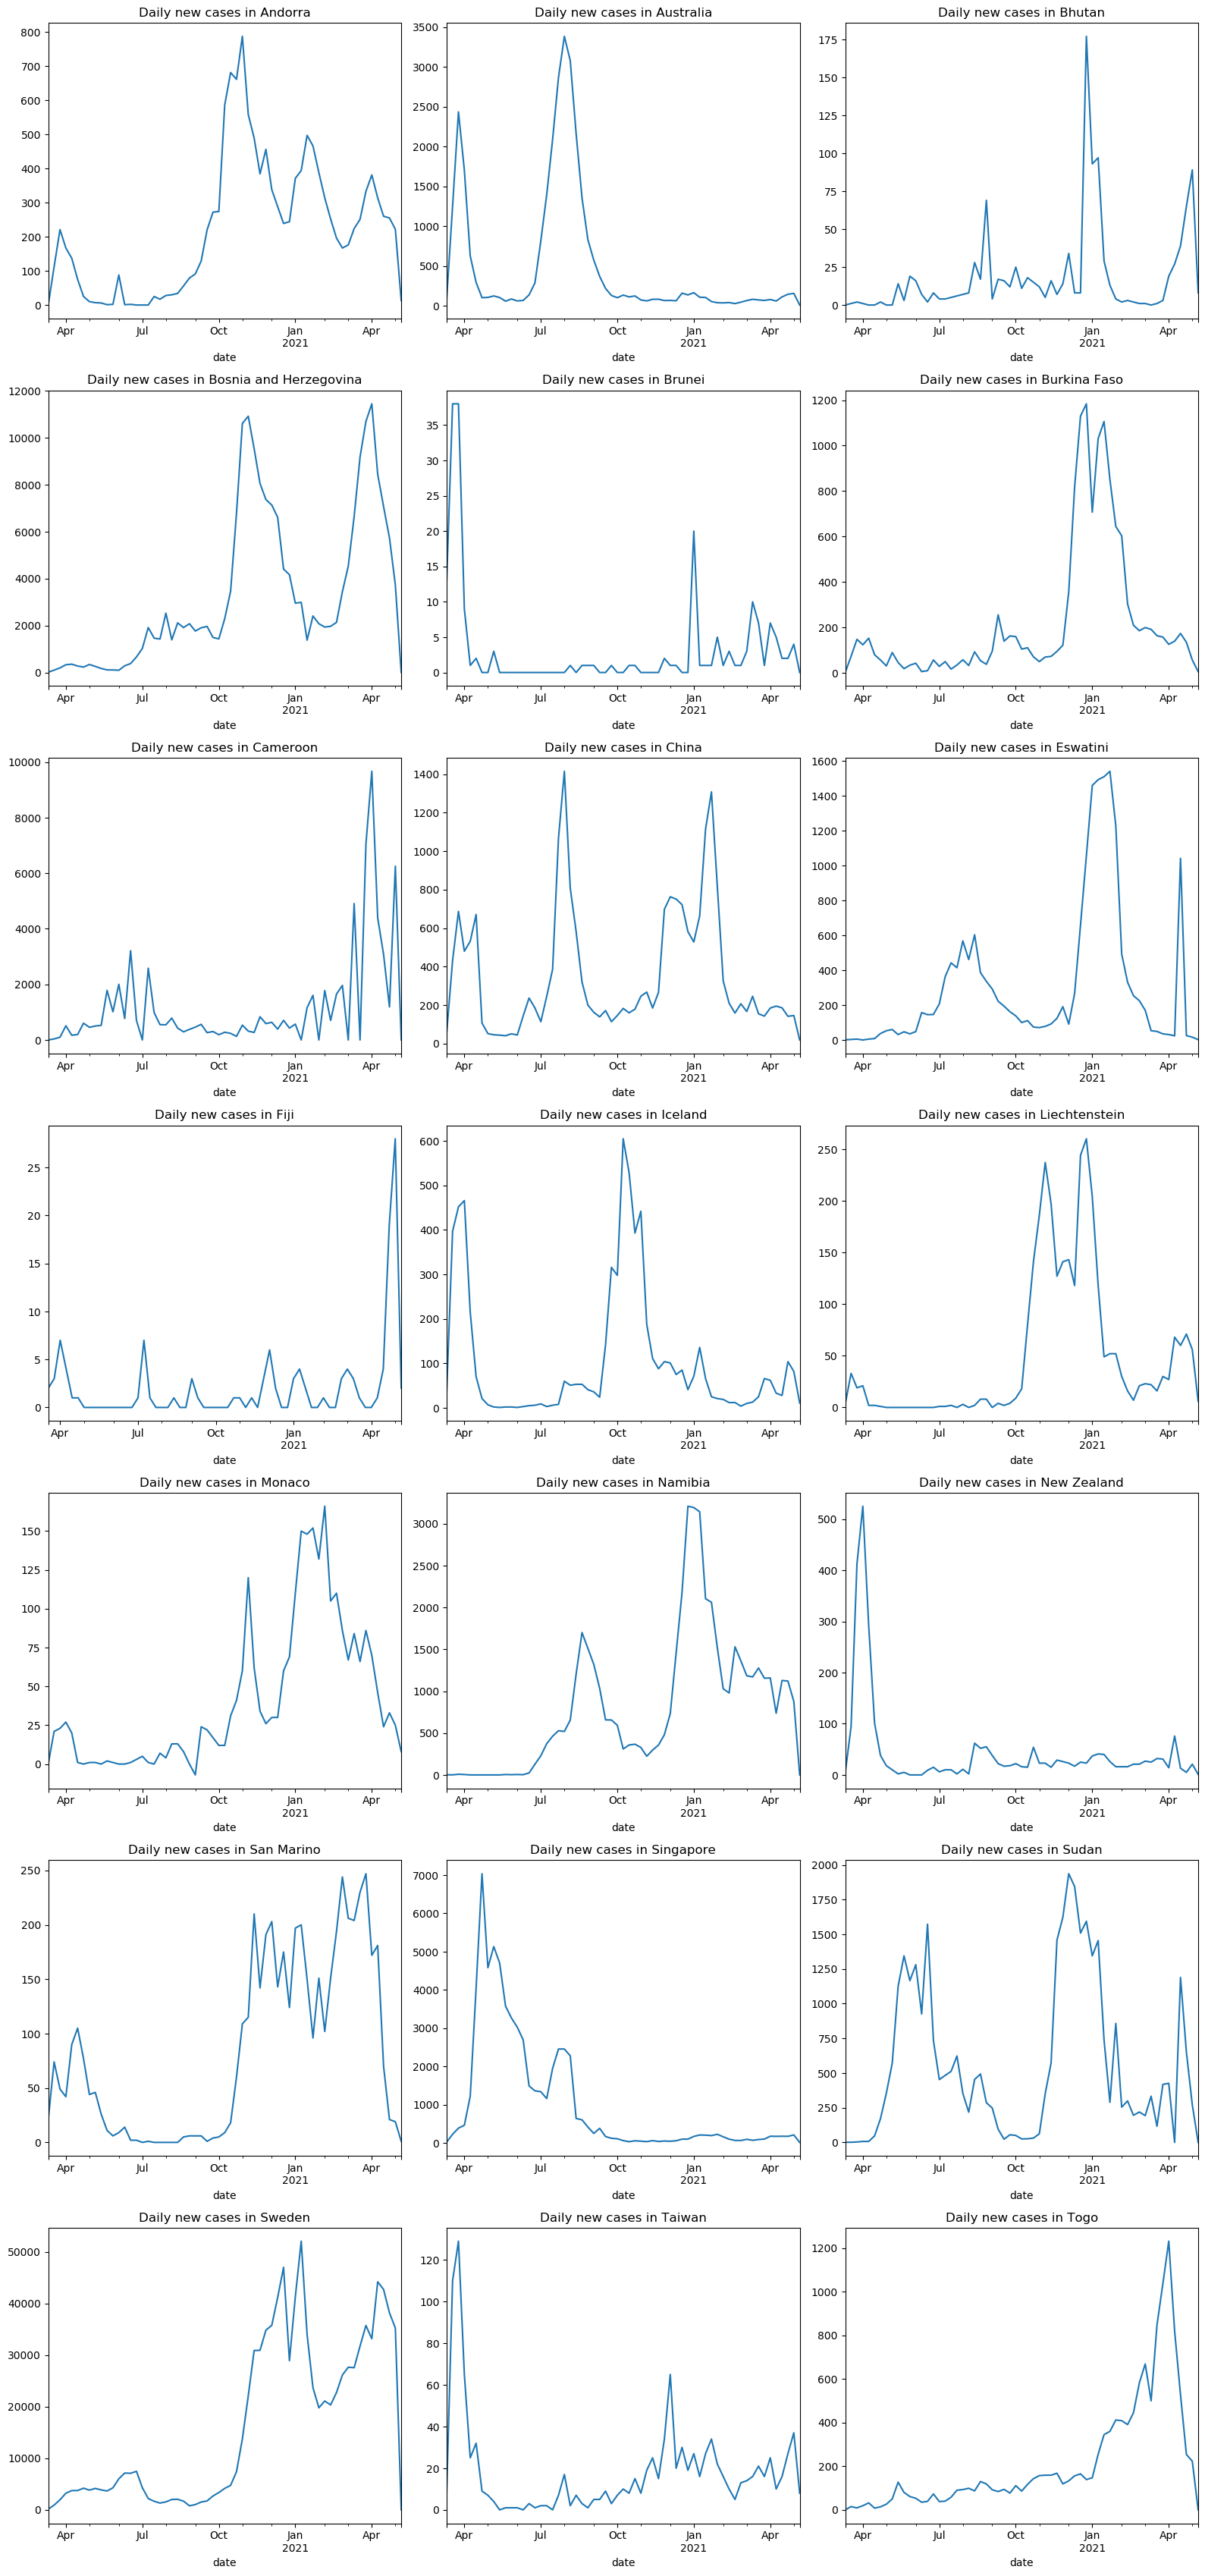

In [17]:
# Consider countries with less than 20 new cases as eradicated
eradicated_df = relevant_df.groupby('country_code').filter(lambda group: group.tail(1)['new_cases'] < 20)

fig = plt.figure(figsize=(16, 48), dpi=100)
i = 1

for country_name in eradicated_df['country_name'].unique():
    ax = fig.add_subplot(10, 3, i)
    ax.set_title("Daily new cases in " + country_name, fontsize=12)
    eradicated_df[eradicated_df["country_name"] == country_name].resample('W', on='date')['new_cases'].sum().plot(ax=ax, x="date", y="new_cases")    
    i = i + 1

fig.tight_layout()

### Filter countries by total_cases and weekly new_cases 

We now assume countries that eradicated COVID are the ones with less than 20 average new cases in the last week of the dataset with greater than 50 overall total cases

In [18]:
weekly_avg_cases_df = relevant_df.groupby('country_name').apply(lambda group: group.resample('W', on='date')['new_cases'].mean())
overall_cases_df = relevant_df.groupby('country_name')['new_cases'].sum()
eradicated_df = weekly_avg_cases_df.groupby('country_name').filter(lambda group: group.tail(2)[0] < 20)
eradicated_countries = eradicated_df.index.unique().levels[0]

### Show weekly new cases of the countries

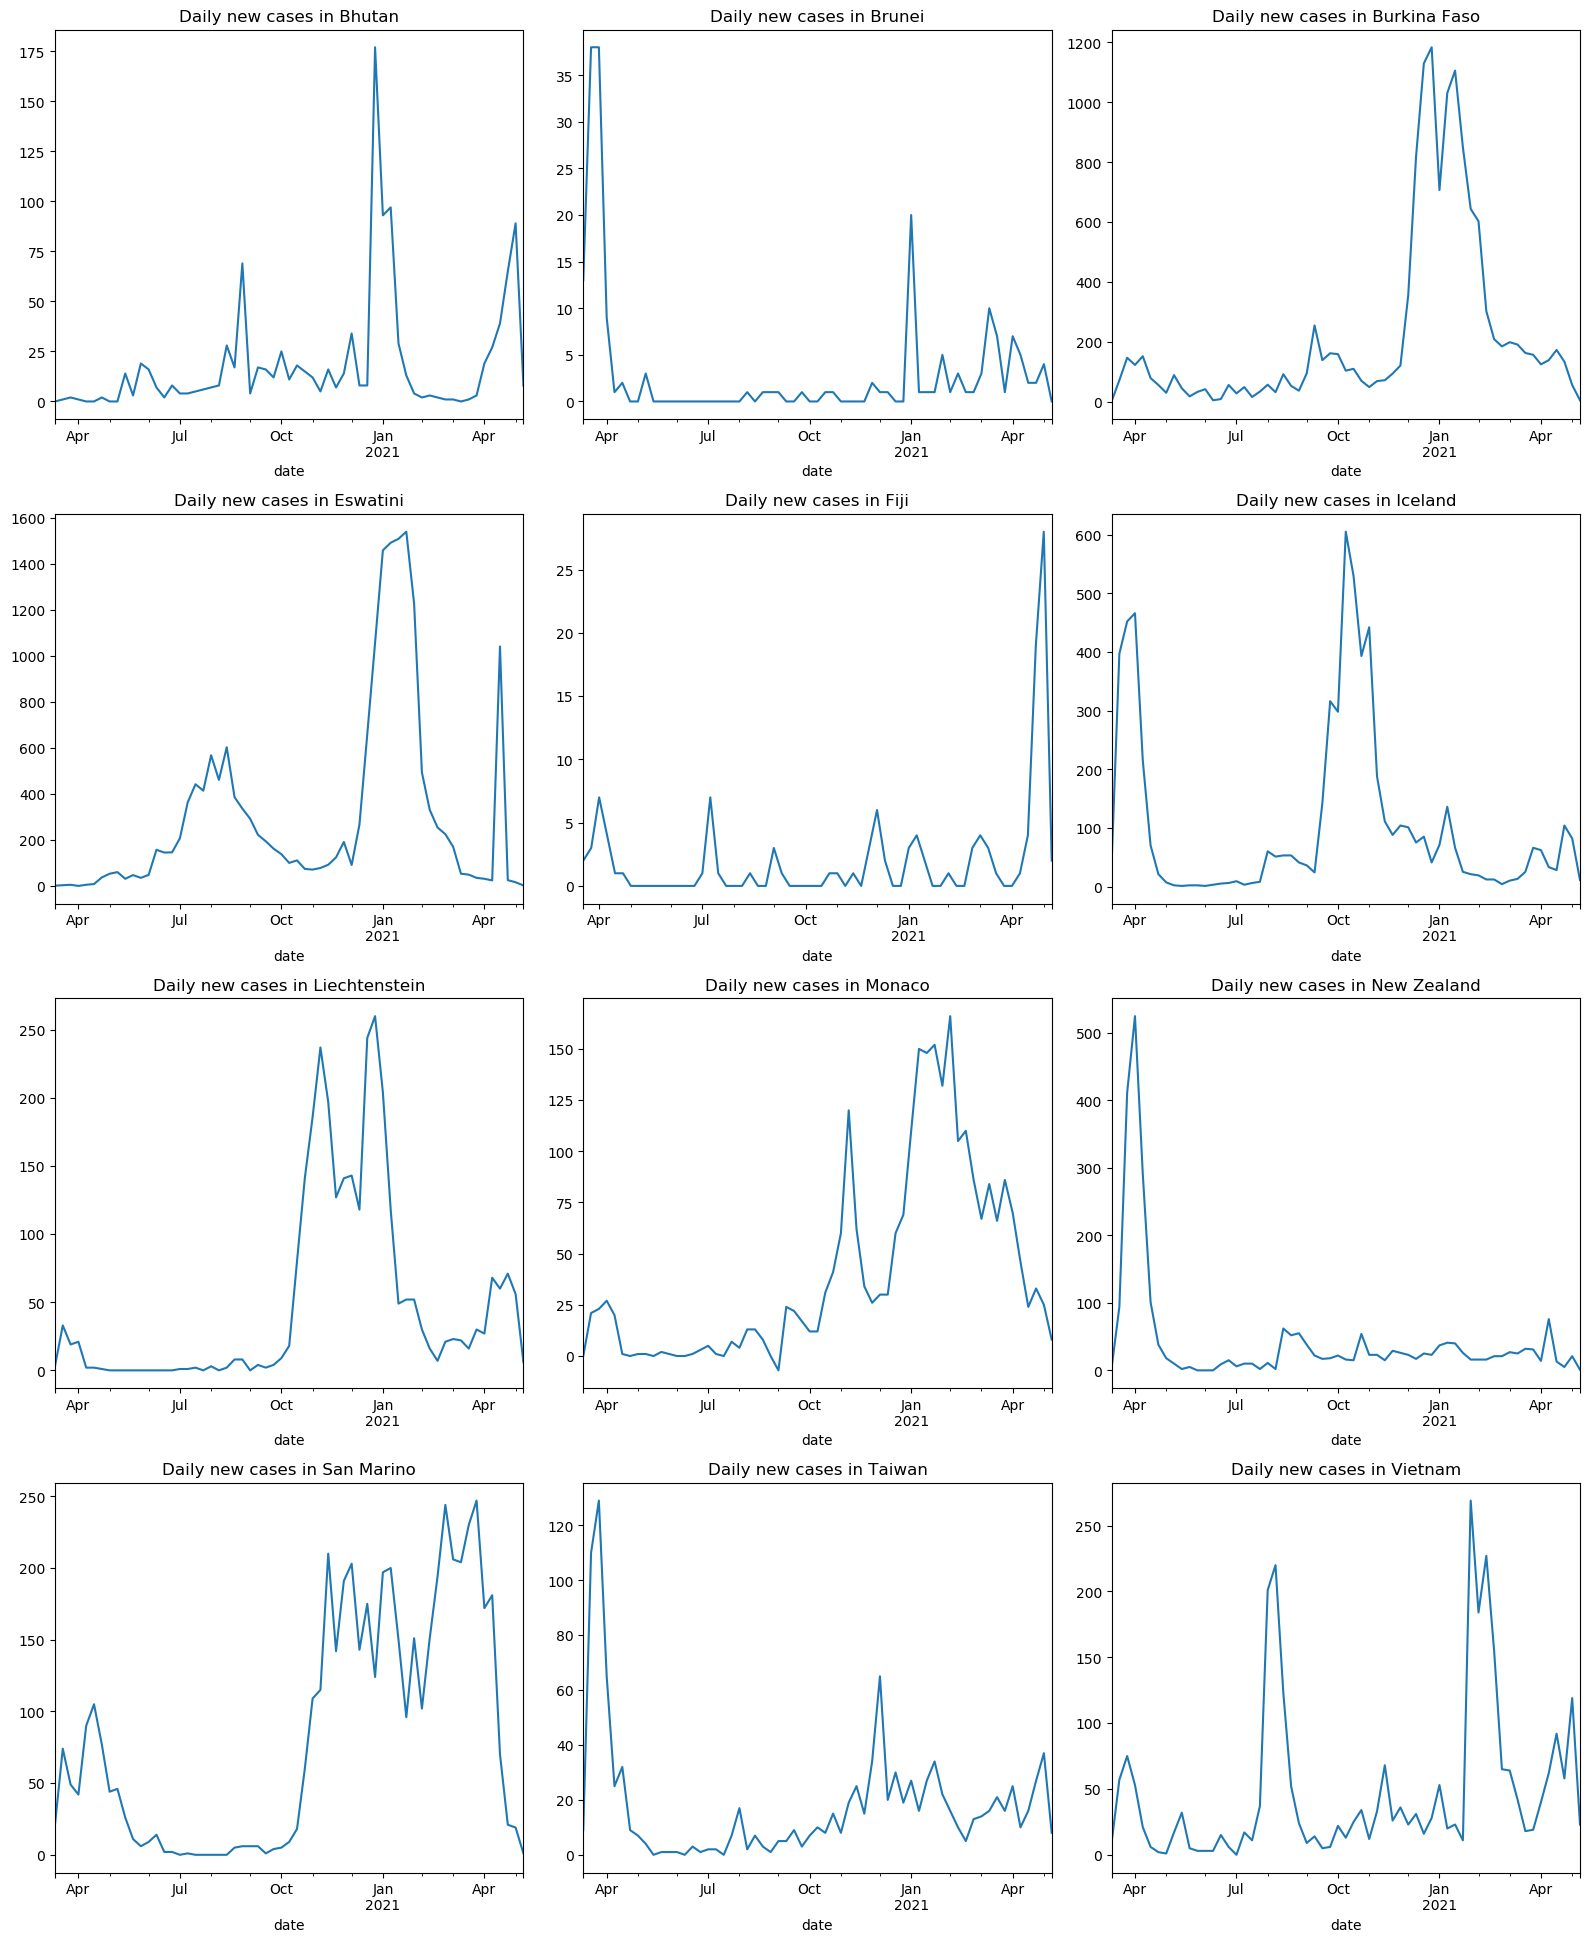

In [19]:
fig = plt.figure(figsize=(16, 48), dpi=100)
i = 1

for country_name in eradicated_countries:
    if overall_cases_df[country_name] >= 50:
        ax = fig.add_subplot(10, 3, i)
        ax.set_title("Daily new cases in " + country_name, fontsize=12)
        relevant_df[relevant_df["country_name"] == country_name].resample('W', on='date')['new_cases'].sum().plot(ax=ax, x="date", y="new_cases")    
        i = i + 1

fig.tight_layout()

Observations


*   A common pattern observed in countries that eradicated COVID is that after every peak of new cases, it goes back down, maintaining little to no trend.
*   New Zealand has had less than 100 to no new cases of COVID-19 since July of 2020.
*   Singapore and Taiwan have also been able to control their number of cases through similar means as New Zealand. They were able to mitigate COVID-19 and had a steady decline of cases. 
*   There is a small number of cases in Fiji and Brunei, attributed the the smallness of the population as well as the remoteness of the location. 
*   Another possible reason for reporting low cases that may not mean an improvement in the actual number of daily cases is the loss of testing and resources. 
*   Countries such as Bosnia and Herzegovina and Sudan have large spikes and low valleys as they stop reporting new cases. 

New Zealand has had less than 100 to no new cases of COVID-19 since July of 2020. And you will be able to see that even when their COVID cases spike, it’s substantially less than other countries. Singapore and Taiwan have also been able to control their number of cases through similar means as New Zealand. They were able to mitigate COVID-19 and had a steady decline of cases. There is a small number of cases in Fiji and Brunei, attributed the the smallness of the population as well as the remoteness of the location. Another reason for reporting low cases that may not mean an improvement in the actual number of daily cases is the loss of testing and resources. Countries such as Bosnia and Herzegovina and Sudan have large spikes and low valleys as they stop reporting new cases. 

References:

https://www.abc.net.au/news/2020-08-16/which-countries-have-zero-cases-of-coronavirus-how/12555562

https://unctad.org/news/coronavirus-lets-not-forget-worlds-poorest-countries



## Which government responses were implemented the most in these countries?

For each country that eradicated COVID, if they implemented a response once, count it.

For any flag that is not 0, just treat it as 1

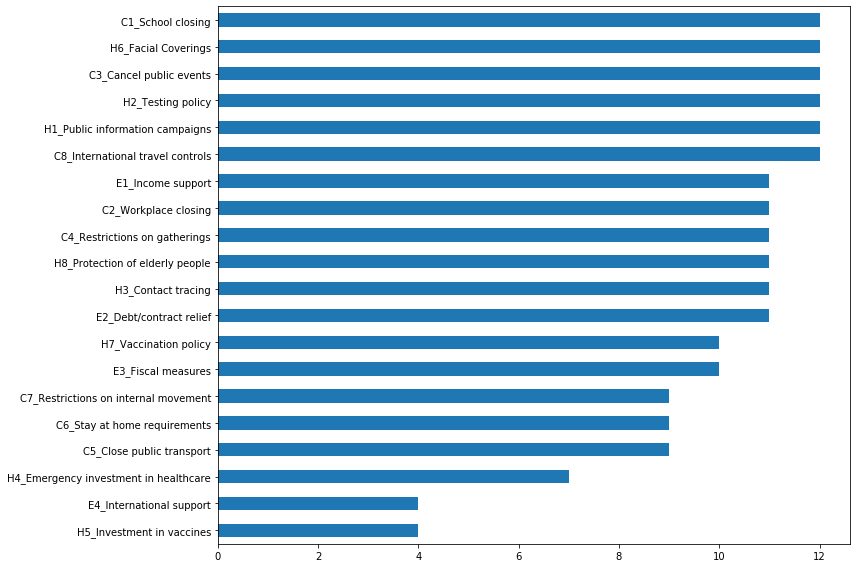

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

col_list = relevant_df.columns[relevant_df.columns.get_loc("C1_School closing"):]
# Sum up the policies 
res_agg_df = relevant_df[relevant_df['country_name'].isin(eradicated_countries)].groupby('country_code')[col_list].sum()
# A country never implemented a policy if and only if the sum of all rows is 0
for col in res_agg_df.columns:
    res_agg_df.loc[res_agg_df[col] != 0, col] = 1

res_agg_df = res_agg_df.sum()

res_agg_plot = res_agg_df.sort_values(ascending=True).plot(kind="barh", ax=ax)

fig.tight_layout()

### Observations & Insights

*   All countries implemented measures such as 
  *   C1_School Closing
  *   H6_Facial Coverings
  *   C3_Cancel publics events
  *   H2_Testing Policy
  *   H1_Public information campaigns
  *   C8_International travel controls
*   The least frequent measures implemented by the countries are
  *   E4_International support
  *   H5_Investment in vaccines


The most popular responses for the 21 countries that were able to mitigate the spread of COVID were the shutdown of schools, wearing of masks, cancellation of public events, mass testing, information campaigns and lastly, restrictions when it came to international travel. Governments prioritized restricting internal movements and converting most of their population to an online setting. People that need to go out for work or other reasons are required to wear face masks. The purpose of wearing a face mask is for people to protect themselves and the people around them.

These policies were based on the recommendations of the World Health Organization (WHO). These containment and mitigation policies buy time for the health care systems of different countries to adapt to COVID‑19 and treat their patients.

References:

https://www.oecd.org/coronavirus/policy-responses/flattening-the-covid-19-peak-containment-and-mitigation-policies-e96a4226/

## What is the trend of the number of new cases when lockdown is implemented? What is the trend of the number of new cases when there is no lockdown?

A country implemented lockdown for the entire month if the unique values does not include 0 (no lockdown)

In [21]:
# Get all entries for the month of October
oct_df = relevant_df[(relevant_df['date'].dt.month == 10) & (relevant_df['date'].dt.year == 2020)]
no_lockdown_list = []
lockdown_list = []

for country in oct_df['country_code'].unique():
    unique = oct_df[oct_df['country_code'] == country]['C7_Restrictions on internal movement'].unique()
    if 0 not in unique:
        lockdown_list.append(country)
    elif len(unique) == 1:
        no_lockdown_list.append(country)

Get 5 countries from the list of no lockdown and graph

---

Get 5 countries from the list of lockdown and graph



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


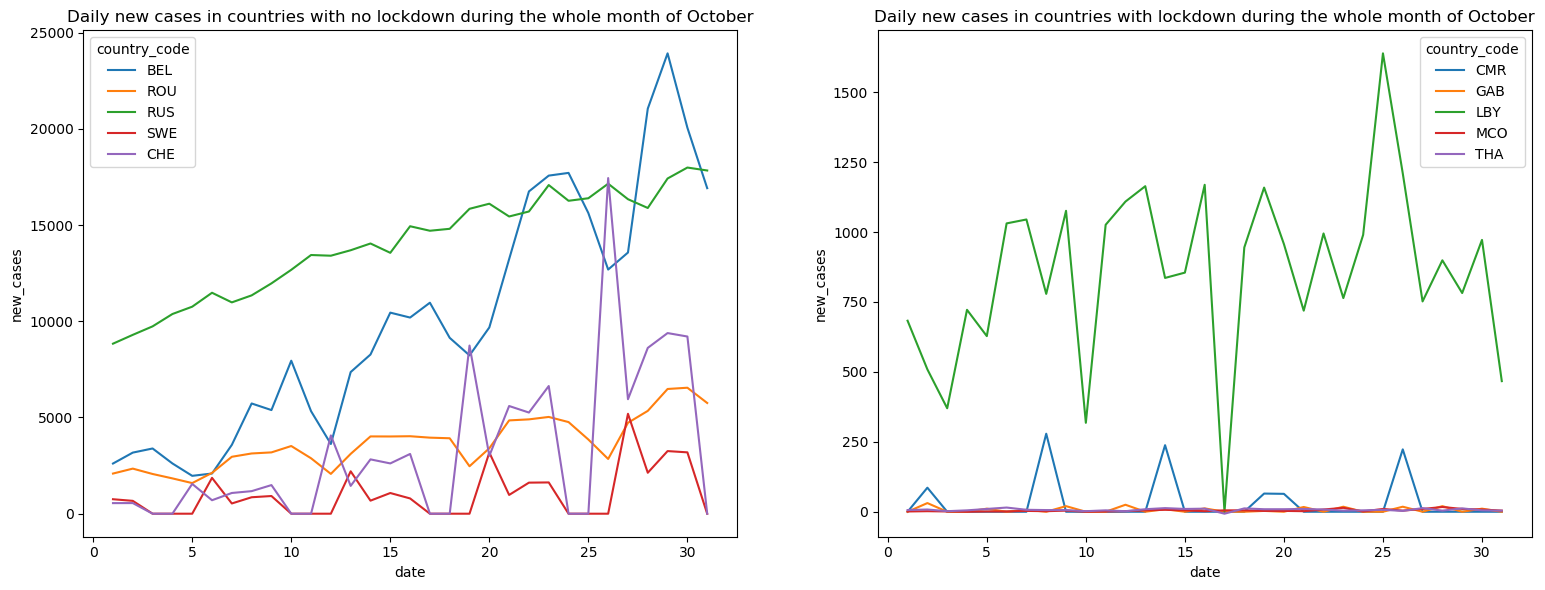

In [22]:
fig = plt.figure(figsize=(16, 6), dpi=100)

ax = fig.add_subplot(1, 2, 1)

ax.set_title("Daily new cases in countries with no lockdown during the whole month of October")    
no_lockdown_df = oct_df[oct_df['country_code'].isin(no_lockdown_list)][['country_code', 'date', 'new_cases']]
no_lockdown_list = no_lockdown_df.sort_values(by='new_cases', ascending=False)['country_code'].unique()[:5]
no_lockdown_df = no_lockdown_df[oct_df['country_code'].isin(no_lockdown_list)][['country_code', 'date', 'new_cases']]
no_lockdown_df['date'] = no_lockdown_df['date'].dt.day 
no_lockdown_plot = sns.lineplot(ax=ax, data=no_lockdown_df, x="date", y="new_cases", hue="country_code")

 
ax = fig.add_subplot(1, 2, 2)
ax.set_title("Daily new cases in countries with lockdown during the whole month of October")    
lockdown_df = oct_df[oct_df['country_code'].isin(lockdown_list)][['country_code', 'date', 'new_cases']]
lockdown_list = lockdown_df.sort_values(by='new_cases', ascending=True)['country_code'].unique()[:5]
lockdown_df = lockdown_df[oct_df['country_code'].isin(lockdown_list)][['country_code', 'date', 'new_cases']]
lockdown_df['date'] = lockdown_df['date'].dt.day
lockdown_plot = sns.lineplot(ax=ax, data=lockdown_df, x="date", y="new_cases", hue="country_code")
fig.tight_layout()

### Observations & Insights

*   Countries that had no lockdown had a growing and high number of new cases
*   Countries that had a lockdown had significantly less new cases
*   Libya [LBY] is an outlier when it comes to daily new cases given the country's preventive measures on COVID

The majority of the countries that did NOT implement a lockdown had a steady rise in new daily cases. On the other hand, the majority of the countries that implemented a lockdown had almost zero daily new cases, with the exception of Libya.
Part of the reason why Libya became an exception is that it was found that the awareness of the existence of COVID-19 and preventive measures is high across Libya, among both Libyans and non-Libyans. Non-Libyans, however, are generally less aware of transmission mechanisms. With regards to risk perception, non-Libyans are less likely to believe that the virus is spreading within their community, but are likely to believe that the virus' effects are that of severe or even life-threatening.

Reference:
https://reliefweb.int/report/libya/covid-19-behavior-assessment-libya-design-risk-communication-and-community-engagement

## What is the trend of the number of new cases when mass testing is being carried out? What is the trend of the number of new cases when there is no mass testing?

A country implemented testing for the entire month if the unique values does not include 0 (no lockdown)

In [23]:
# Get all entries in the month of March
mar_df = relevant_df[(relevant_df['date'].dt.month == 3) & (relevant_df['date'].dt.year == 2020)]
no_testing_list = []
testing_list = []

for country in mar_df['country_code'].unique():
    unique = mar_df[mar_df['country_code'] == country]['H2_Testing policy'].unique()
    if 0 not in unique:
        testing_list.append(country)
    elif len(unique) == 1:
        no_testing_list.append(country)

Get 5 countries from the list of no testing and graph

---

Get 5 countries from the list of with testing and graph

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


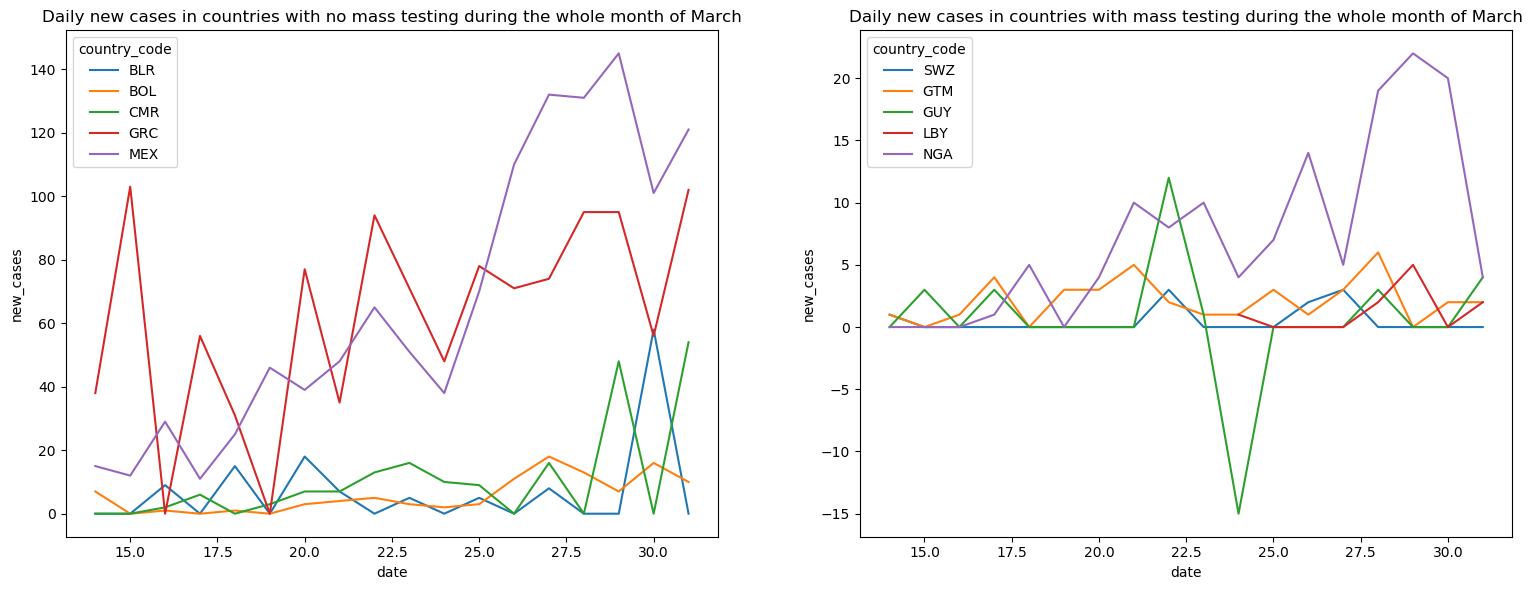

In [24]:
fig = plt.figure(figsize=(16, 6), dpi=100)


ax = fig.add_subplot(1, 2, 1)
ax.set_title("Daily new cases in countries with no mass testing during the whole month of March")    
no_testing_df = mar_df[mar_df['country_code'].isin(no_testing_list)][['country_code', 'date', 'new_cases']]
no_testing_list = no_testing_df.sort_values(by='new_cases', ascending=False)['country_code'].unique()[1:6]
no_testing_df = no_testing_df[mar_df['country_code'].isin(no_testing_list)][['country_code', 'date', 'new_cases']]
no_testing_df['date'] = no_testing_df['date'].dt.day 
no_testing_plot = sns.lineplot(ax=ax, data=no_testing_df, x="date", y="new_cases", hue="country_code")


ax = fig.add_subplot(1, 2, 2)
ax.set_title("Daily new cases in countries with mass testing during the whole month of March")    
testing_df = mar_df[mar_df['country_code'].isin(testing_list)][['country_code', 'date', 'new_cases']]
testing_list = testing_df.sort_values(by='new_cases', ascending=True)['country_code'].unique()[:5]
testing_df = testing_df[mar_df['country_code'].isin(testing_list)][['country_code', 'date', 'new_cases']]
testing_df['date'] = testing_df['date'].dt.day
testing_plot = sns.lineplot(ax=ax, data=testing_df, x="date", y="new_cases", hue="country_code")
fig.tight_layout()

### Observations & Insights

For countries that had no mass testing:
*   Daily cases showed an upward trend.
*   The peak of their cases is close to the end of the month.
 

Countries that implemented mass testing: 

*   Had relatively low new daily cases, with the exception of Nigeria.
*   Has a relatively flat curve, with the exception of Nigeria again.
*   It was shown that the reason why Nigeria is an outlier is because the country is attempting to hurriedly open the economy, which could sacrifice public health gains for temporary economic gains.

For countries that had no mass testing, daily cases showed an upward trend, and it was found that the peak of their cases is close to the end of the month. On the other hand, countries that implemented mass testing have had relatively low daily new cases as well as having a relatively flat curve, with the exception of Nigeria. "Test and Trace" approaches have been implemented. However, implementation has happened on a base of weak health systems, sluggish emergency response, weak accountability systems, and fragmented data and information monitoring systems. It was shown that Nigeria is an outlier because the country is attempting to hurriedly open the economy, which could sacrifice public health gains for temporary economic gains.

The implementation of mass testing would have shown the country a more unambiguous indication of how the pandemic has already affected the country and what other policies could have been implemented to mitigate the spread of the virus.


Reference:

https://www.brookings.edu/blog/future-development/2020/07/02/how-well-has-nigeria-responded-to-covid-19/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7307993/


## Does the implementation of contact tracing while mass testing is being carried out affect the number of daily cases?

### Choosing a date range

April 17 to April 30 2021 is complete in data, recent, and shows the world's responses to the pandemic's outbreaks. And so this range of dates was considered interesting dates. We chose to observe the span of 14 days as it is the typical length for quarantining.

In [25]:
interestingDates = ["2021-04-17", "2021-04-18", "2021-04-19", "2021-04-20", "2021-04-21", "2021-04-22", "2021-04-23", "2021-04-24", "2021-04-25", "2021-04-26", "2021-04-27", "2021-04-28", "2021-04-29", "2021-04-30"]

In [26]:
df.loc[df['date'].isin(interestingDates)]

,country_code,country_name,date,total_cases,new_cases,population,people_vaccinated,people_fully_vaccinated,C1_School closing,C2_Workplace closing,...,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people
418,AFG,Afghanistan,2021-04-17,57721,109,38928341,200000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
419,AFG,Afghanistan,2021-04-18,57793,72,38928341,208000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
420,AFG,Afghanistan,2021-04-19,57898,105,38928341,216000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
421,AFG,Afghanistan,2021-04-20,58037,139,38928341,224000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
422,AFG,Afghanistan,2021-04-21,58214,177,38928341,232000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
423,AFG,Afghanistan,2021-04-22,58312,98,38928341,240000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
424,AFG,Afghanistan,2021-04-23,58542,230,38928341,240000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
425,AFG,Afghanistan,2021-04-24,58730,188,38928341,240000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
426,AFG,Afghanistan,2021-04-25,58843,113,38928341,240000,0,0,0,...,0,0,1,3,0,0,0,2,2,0
427,AFG,Afghanistan,2021-04-26,59015,172,38928341,240000,0,0,0,...,0,0,1,3,0,0,0,2,2,0


### Finding the average number of new cases for countries that implement testing and contact tracing


this was done by looping from the range of dates and constricting the selection to countries that don't have a value of 0 for contact tracing or testing policies

0.0 in contact tracing indicates that there is no contact tracing
1.0 in testing policy indicates that there is minimal testing policies. Additionally, in this date range, there were no countries that were not implementing any testing policies


The daily average is typically 20,000 because though some countries have 0 or low numbers of new cases, there are also many countries that have over 50,000 daily cases. India is an outlier, and has over 400,000 cases daily, while implementing these measures. The event of outbreaks is evenly spread through the dataset, so ommitting any country would have been inappropriate.

In [27]:
bothPrecautions = []

In [28]:
for date in interestingDates:
  dateOfInterest = df.loc[(df['date'] == date) & (df['H3_Contact tracing'] != 0.0) & (df['H2_Testing policy'] != 1.0) & (df['H2_Testing policy'] != 0.0)].copy()
  bothPrecautions.append(dateOfInterest["new_cases"].astype('float64').mean())

In [29]:
bothPrecautions

[23705.85520361991,
 18092.50226244344,
 22618.59009009009,
 26135.68918918919,
 27842.681614349774,
 24846.13452914798,
 26527.2600896861,
 24265.71875,
 14493.183035714286,
 17360.429203539825,
 23672.548672566372,
 25838.274336283186,
 25428.422222222223,
 25170.777777777777]

### Finding the average number of new cases for countries that minimally implement testing and dont implement contact tracing

It was approached similarly to finding the average daily cases of countries that implemented both precautions.

we set the testing policy to 1.0 because it indicates that only people who show symptoms and work in high risk jobs are tested (minimal testing). Additionally, there were no countries that did absolutely no testing; every country tested people who showed symptoms.

there were fewer countries in this selection and a lower daily average number of cases

In [30]:
noPrecautions = []

In [31]:
for date in interestingDates:
  dateOfInterest = df.loc[(df['date'] == date) & (df['H3_Contact tracing'] == 0.0) & (df['H2_Testing policy'] == 1.0) ].copy()
  noPrecautions.append(dateOfInterest["new_cases"].astype('float64').mean())

In [32]:
noPrecautions

[6748.727272727273,
 4301.0,
 3136.4545454545455,
 6721.545454545455,
 7595.818181818182,
 4661.090909090909,
 6792.181818181818,
 6745.727272727273,
 3382.0,
 2859.6363636363635,
 6915.727272727273,
 7666.636363636364,
 7435.545454545455,
 6632.636363636364]

### Plotting the daily averages

We chose to use a bar graph to plot the daily cases because it sufficiently provides comparison for countries that need to use both precautions versus countries that minimally test and dont do contact tracing

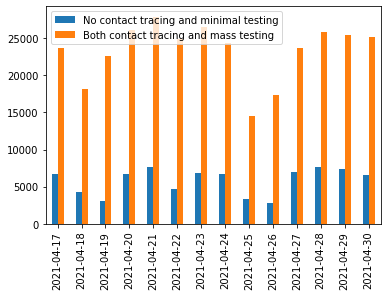

In [33]:
plottedGraph = pd.DataFrame({'No contact tracing and minimal testing': noPrecautions,
                   'Both contact tracing and mass testing': bothPrecautions}, index=interestingDates)
ax = plottedGraph.plot.bar(rot=90)

### Observations & Insights


*   Countries that contact trace and mass test have a higher number of new cases daily
*   Countries experiencing outbreaks are more diligent in contact tracing and mass testing
*   Countries not experiencing outbreaks only minimally test
*   There are no countries that don’t test

Mass testing and contact tracing are among the many responses governments are taking to combat the spread of the virus. Filipinos across the country have cried out for mass testing to become available nationwide, but most of them don't even know what mass testing is, or how it can benefit our country. Mass testing aims to find people with active infection who are asymptomatic or pre-symptomatic; however, many countries such as India are done with rapid testing. Because it needs to be quickly implemented, rapid testing is widely used to support PCR testing. Rapid testing is known to make mistakes in up to 50% of cases and increase false-positive infections. However, officials still think it is necessary due to limited resources. The contacts of 80% of new cases need to be traced within the first 72 hours to mitigate the virus's spread properly. Countries not experiencing outbreaks are less diligent with contact tracing and perform minimal testing, citing conserving resources for suspected infections and future outbreak possibilities.




## What is the trend of the number of new cases when lockdown is implemented while vaccines are being rolled out?

A country implemented lockdown/vaccination for the entire month if the unique values does not include 0 (no lockdown)

In [34]:
# Get all entries for the month of January
jan_df = relevant_df[(relevant_df['date'].dt.month == 1) & (relevant_df['date'].dt.year == 2021)]
no_lockdown_list = []
lockdown_list = []
no_vaccine_list = []
vaccine_list = []

for country in jan_df['country_code'].unique():
    unique = jan_df[jan_df['country_code'] == country]['C7_Restrictions on internal movement'].unique()
    if 0 not in unique:
        lockdown_list.append(country)
    elif len(unique) == 1:
        no_lockdown_list.append(country)
    
    unique = jan_df[jan_df['country_code'] == country]['H7_Vaccination policy'].unique()
    if 0 not in unique:
        vaccine_list.append(country)
    elif len(unique) == 1:
        no_vaccine_list.append(country)

Get 5 countries common from the list of no lockdown and no vaccine and graph

---

Get 5 countries common from the list of with lockdown and with vaccine and graph

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


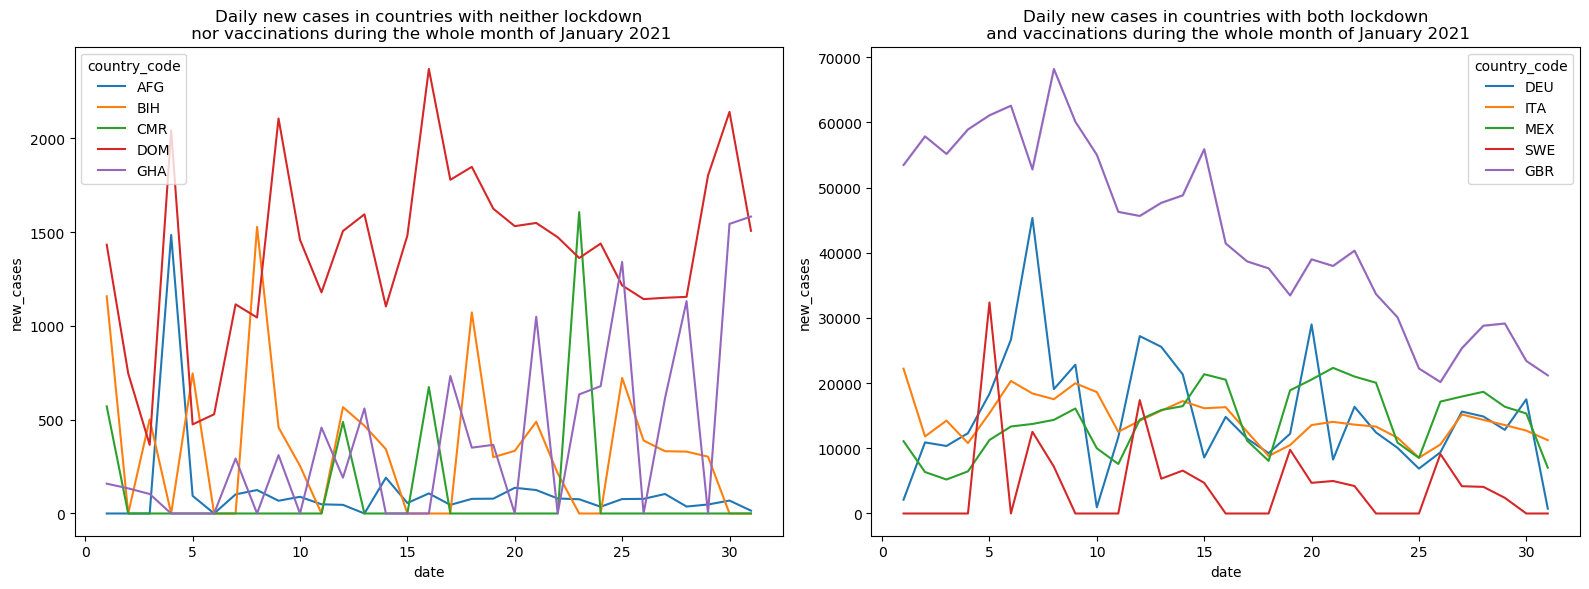

In [35]:
fig = plt.figure(figsize=(16, 6), dpi=100)


ax = fig.add_subplot(1, 2, 1)
ax.set_title("Daily new cases in countries with neither lockdown\n nor vaccinations during the whole month of January 2021")    
no_lockdown_vaccine_df = jan_df[(jan_df['country_code'].isin(no_lockdown_list)) & (jan_df['country_code'].isin(no_vaccine_list))][['country_code', 'date', 'new_cases']]
no_lockdown_vaccine_list = no_lockdown_vaccine_df.sort_values(by='new_cases', ascending=False)['country_code'].unique()[2:7]
no_lockdown_vaccine_df = no_lockdown_vaccine_df[jan_df['country_code'].isin(no_lockdown_vaccine_list)][['country_code', 'date', 'new_cases']]
no_lockdown_vaccine_df['date'] = no_lockdown_vaccine_df['date'].dt.day 
no_lockdown_vaccine_plot = sns.lineplot(ax=ax, data=no_lockdown_vaccine_df, x="date", y="new_cases", hue="country_code")


ax = fig.add_subplot(1, 2, 2)
ax.set_title("Daily new cases in countries with both lockdown\n and vaccinations during the whole month of January 2021")    
lockdown_vaccine_df = jan_df[(jan_df['country_code'].isin(lockdown_list)) & (jan_df['country_code'].isin(vaccine_list))][['country_code', 'date', 'new_cases']]
lockdown_vaccine_list = lockdown_vaccine_df.sort_values(by='new_cases', ascending=False)['country_code'].unique()[1:6]
lockdown_vaccine_df = lockdown_vaccine_df[jan_df['country_code'].isin(lockdown_vaccine_list)][['country_code', 'date', 'new_cases']]
lockdown_vaccine_df['date'] = lockdown_vaccine_df['date'].dt.day
testing_plot = sns.lineplot(ax=ax, data=lockdown_vaccine_df, x="date", y="new_cases", hue="country_code")
fig.tight_layout()

### Observations & Insights

Countries without neither lockdown nor vaccinations:
- Most countries had an upward trend for the amount of daily new cases
- Highest peak shown is from the Dominican Republic

Countries with both lockdown and vaccinations:
- Amount of daily new cases show a downward trend in United Kingdom
- Amount of daily new cases were steady for the other countries that were depicted

Given the size of the population of all the countries, the amount of daily new cases vary but the implementation of lockdowns while vaccines are being distributed has decreased the number of daily cases pointing to a downward trend as opposed to those countries that did not implement either policy deeming the implementation of both policies effective when it comes to mitigating the spread of COVID-19.
Domestic lockdown in the Philippines has been on-going way before the start of the vaccine rollout. There was a spike in new cases in the month of April 2 months after the initial vaccine rollout here in the Philippines. Since then the amount of new cases on a daily basis has gradually dropped given the on-going vaccine rollout. The rollout of vaccines while restricting internal movement within the country has proved effective in reducing the amount of cases as it allows the vaccines to take effect giving those that are vaccinated an added layer of protection against the virus.

## What COVID-19 responses should a country implement to best hamper the spread of COVID-19?

Plot a heatmap from the correlation of variables

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


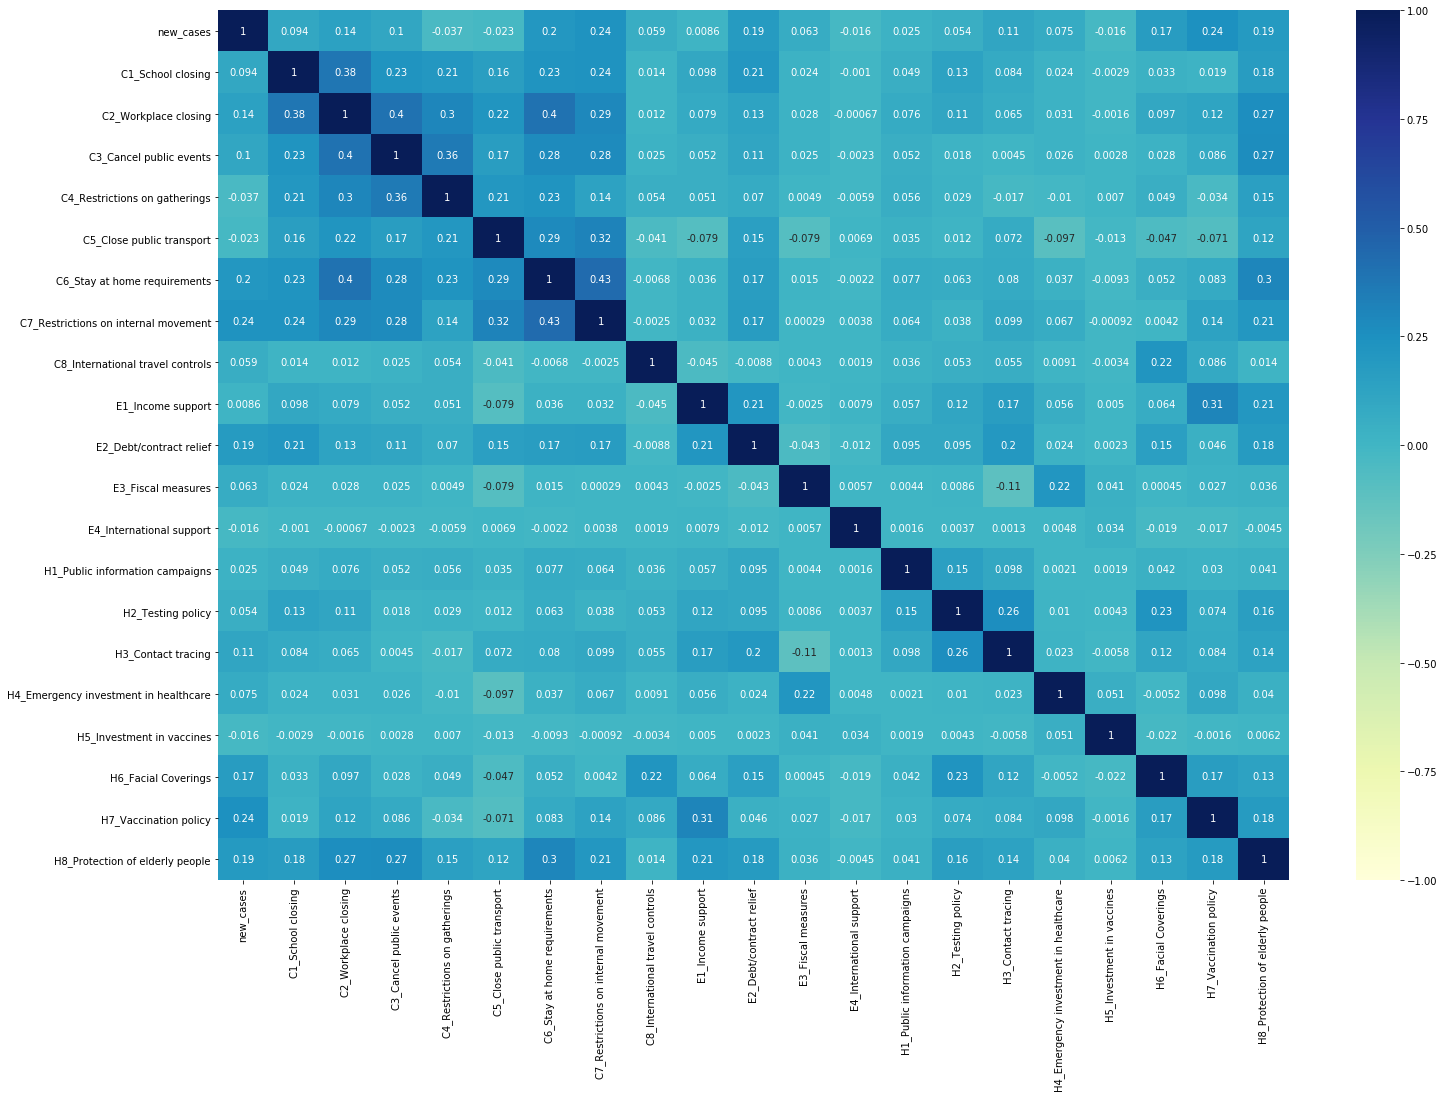

In [36]:
fig, ax = plt.subplots(figsize=(24,16))

response_list = relevant_df.columns[relevant_df.columns.get_loc("C1_School closing"):]

response_df = relevant_df[response_list] 
for col in response_df.columns:
    response_df.loc[response_df[col] != 0, col] = 1
corr_df = pd.concat([relevant_df["new_cases"], response_df], axis=1)

corr_heatmap = sns.heatmap(corr_df.corr(), 
                                center=0, 
                                cmap="YlGnBu", 
                                annot=True, 
                                vmin=-1, 
                                vmax=1,
                                ax=ax)

### Observations & Insights

*   Restrictions on gatherings, close public transport, international financial support, investment in vaccines are more effective than the rest.
*   Restrictions on gatherings is the most effective protocol

When looking at the correlation of the new cases to the implemented protocols, a number closer to negative one (-1) means that the number of daily new cases goes down. It was observed that *restrictions on gatherings, close public transport, international financial support, investment in vaccines* are the ones with values that approach negative one (-1). This means that these protocols are more effective than the others in reducing the amount of daily new cases.

## When can we expect all Filipinos to have at least one shot of COVID-19 vaccination?

### Plot the number of Filipinos vaccinated over time

There are 109581085 Filipinos in the country


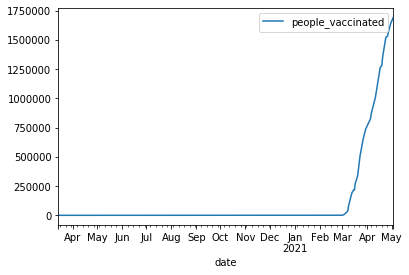

In [37]:
phl_population = relevant_df[relevant_df["country_code"] == "PHL"]["population"].unique()[0]
print(f"There are { phl_population } Filipinos in the country")
phl_df = relevant_df[relevant_df["country_code"] == "PHL"][["date", "people_vaccinated"]]
phl_df.plot(x="date", y="people_vaccinated")


*   It can be observed here that there's a quick increase in the number of people getting their vaccinations as it is the start of vaccination rollout.

March 1 is when vaccinations for health workers were officially LEGALLY rolled out. People may have gotten vaccinations through less legal means earlier in the year but those are not recorded in the dataset. The dataset only records the vaccinations issued by the government. The rollout of vaccinations has not slowed down so far, and this is reflected in the sharp and quick trend upwards of the number of people getting vaccinated.


https://www.rappler.com/nation/philippines-begins-legally-rolling-out-covid-19-vaccine-march-1-2021

Philippines only started recording vaccinations around March, so let's start there.

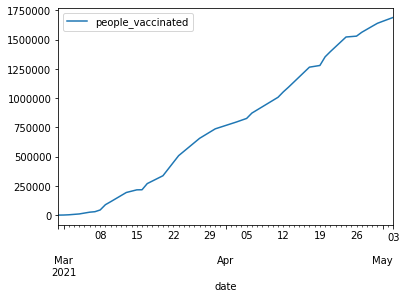

In [38]:
phl_df = phl_df[phl_df['people_vaccinated'] == 0].tail(1).append(phl_df[phl_df['people_vaccinated'] > 0])
phl_df.plot(x="date", y="people_vaccinated")


The graph looks linear



*   There are small fluctuations, but there is a consistent trend upwards in the number of people legally getting vaccinations

At this point, more people other than healthcare workers are starting to get their first dose vaccinations. This is reflected in the steadily growing number of people getting vaccinations.



### Use linear regression to predict the date given the popoulation of the Philippines

In [39]:
phl_df['days'] = np.arange(phl_df['date'].size)

fit = np.polyfit(phl_df['people_vaccinated'], phl_df['days'], 1)
fit_fn = np.poly1d(fit)

days = fit_fn(phl_population)
prediction_date = phl_df.iloc[0]['date'] + pd.DateOffset(days=days)
print("Predicted date is " + str(prediction_date))

Predicted date is 2031-05-18 16:24:57.337358




*  The prediction through linear regression is that it will take 9 more years to completely vaccinate the Philippines

At the rate the Philippines is currently rolling out vaccinations, it is predicted to take up till 2031 to fully vaccinate the population. We arrived at this prediction by using linear regression.



### Plot the existing data alongside the regression line 

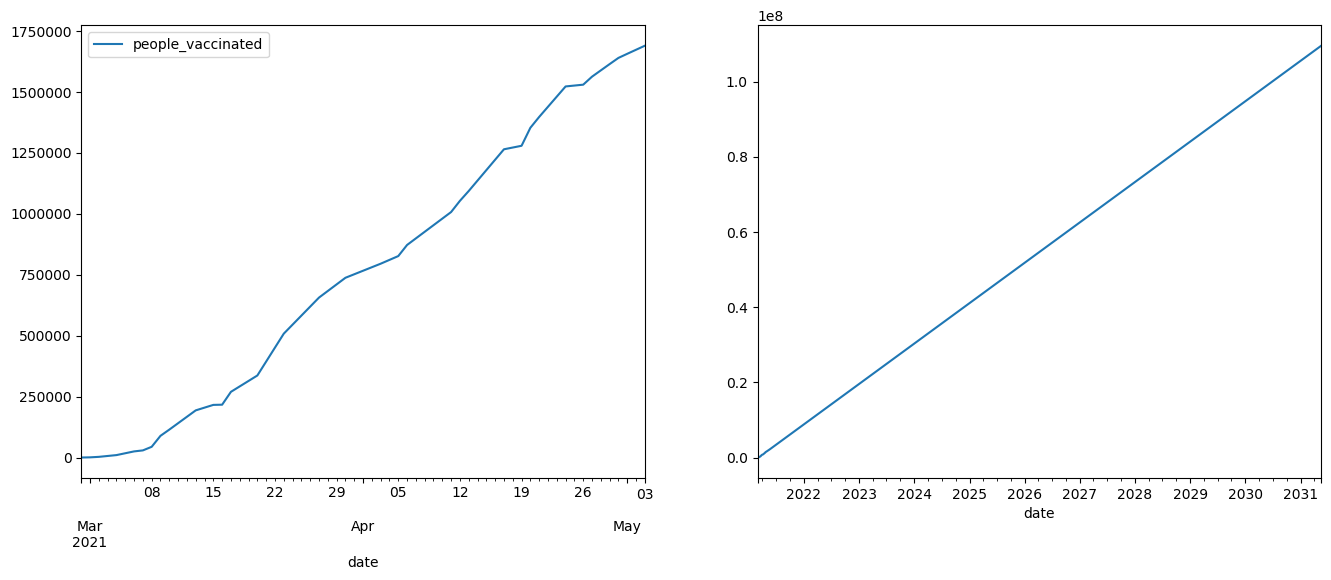

In [40]:
fig = plt.figure(figsize=(16, 6), dpi=100)
ax = fig.add_subplot(1, 2, 1)
phl_df.plot(x='date', y='people_vaccinated', ax=ax)

ax = fig.add_subplot(1, 2, 2)
prediction_df = phl_df[['date', 'people_vaccinated']]
new_row = {'date': prediction_date, 'people_vaccinated': phl_population}
prediction_df = prediction_df.append(new_row, ignore_index=True)
prediction_df = prediction_df.resample('D', on='date').sum()
prediction_df.loc[prediction_df['people_vaccinated'] == 0, 'people_vaccinated'] = np.NaN
prediction_df.iloc[0]['people_vaccinated'] = 0 
# prediction_df
prediction_df = prediction_df['people_vaccinated'].interpolate()
prediction_df.plot(x='date', y='people_vaccinated', ax=ax)

*   There is an upward trend of people legally getting vaccinations
*   It correctly reflects that currently only 1% of the Philippine population is vaccinated
*   We predicted that by the end of 2022, 40% of the population will be vaccinated; the government projects that by the end of 2021, 40% of the population will be vaccinated

CNN Philippines listed the government schedule of the vaccine rollout for the year and the schedule closely corresponds with our observations. However, our prediction is not as optimistic as the projections made by the government. At the rate that the Philippines is rolling out vaccines, and taking into consideration the mitigation methods and prioritization, 140.5 million doses are projected to have been distributed by the end of 2021. This means that at least 40% of the Philippine population is projected to be fully vaccinated by the end of 2021. We predicted that 40% of the population will take until the end of 2025 to be vaccinated, based on the current rate of vaccination rollout. According to the DOH, 60% of Filipinos will be vaccinated by 2022; fully vaccinating the urban population will be achieved by 2025; fully vaccinating the urban and rural population will be achieved by 2027. This is a point of contention between their projections and our prediction, with a 3 year difference. However, if they were to increase the speed of which vaccines are being rolled out while safely and successfully implementing other mitigation methods, their projection may be achieved.

# Conclusion

To conclude this study, here is a quick summary of what was discussed.

It was observed that countries that had "eradicated" COVID-19 had implemented several containment policies and protocols, such as school closures, lockdowns, and restrictions on international travel. Along with these containment policies and protocols, they also implemented strict mask-wearing protocols, testing policies, and campaigns that helped the public become well informed about COVID-19. 

As previously mentioned, countries eradicated COVID-19 implemented lockdown procedures. While countries that did not had a significant rise in new cases. Countries that did not implement mass testing procedures also saw a significant upward trend to their new cases. On the other hand, countries that had the mass testing procedures and contact tracing protocols were able to stabilize their number of new cases by being able to track outbreaks accurately. Additionally, when countries implemented the aforementioned lockdown protocols and paired it with the rolling out of vaccines, new cases showed a downward trend. Factors such as strict restrictions of gatherings, shutting down public transportation, asking for aid in the way of international financial support, and investment of vaccines also helped these countries significantly reduce their new cases. 

If we had implemented protocols like mass testing and followed lockdown procedures, the country would not be in the state that it is today. If our government had used the financial support that was received for COVID-19 and shut down public transportation, we would have seen a drop in the number of new cases. In the Philippines' current rate of vaccine rollout, we predicted that only 40% of the population would have at least one dose of the vaccine by the end of 2025, a far cry from the D.O.H.'s projection of 40% being fully vaccinated by the end of 2021. Moreover, we predicted that it would take until 2031 to vaccinate the population, while the D.O.H. projected at 2027. Had government invested the financial support into vaccinations, our prediction would have been more optimistic and in line with their projections.

# References


References

https://doh.gov.ph/Vaccines/when-will-the-COVID-19-available-to-me

https://doi.org/10.1136/bmj.m3262

https://journals.sagepub.com/doi/full/10.1177/1868103421994261

https://www.abc.net.au/news/2020-08-16/which-countries-have-zero-cases-of-coronavirus-how/12555562

https://www.brookings.edu/blog/future-development/2020/07/02/how-well-has-nigeria-responded-to-covid-19/

https://www.cdc.gov/coronavirus/2019-ncov/php/contact-tracing/contact-tracing-plan/contact-tracing.html

https://www.cnnphilippines.com/news/2021/3/25/TIMELINE-COVID-19-vaccines-deliveries-rollout-Philippines.html

https://www.oecd.org/coronavirus/policy-responses/flattening-the-covid-19-peak-containment-and-mitigation-policies-e96a4226/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7307993/

https://ourworldindata.org/coronavirus/country/philippines

https://ourworldindata.org/coronavirus/country/sudan

https://reliefweb.int/report/libya/covid-19-behavior-assessment-libya-design-risk-communication-and-community-engagement

https://unctad.org/news/coronavirus-lets-not-forget-worlds-poorest-countries

https://www.who.int/emergencies/diseases/novel-coronavirus-2019/covid-19-vaccines
